Welcome to the wonderful world of Markov Chain Monte Carlo

Here I present a toy example of how one can use MCMC to get a pretty good improvement over straight averaging

In [1]:
import numpy as np
from pymc3 import *
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

The following cell creates the two models with noise based on a target.
One should note that the first model has more noise than the second model so one would expect model 1 to perform worse than model 2

In [2]:
size = 200
true_intercept = 1
true_slope = 2
x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
model1 = true_regression_line + np.random.normal(scale=.5, size=size) #Noisy
model2 = true_regression_line + np.random.normal(scale=.2, size=size) #Less Noisy

Let us see what the MAE looks like

In [3]:
print(mean_absolute_error(true_regression_line,model1))
print(mean_absolute_error(true_regression_line,model2))

0.379662204555
0.184027488975


As expected the noisier model does worse

Now let us look at the straight average

In [4]:
print(mean_absolute_error(true_regression_line,model1*.5+model2*.5))

0.210548317641


As one can see this isn't as good as our top model

Now comes the cool part.  We are going to use MCMC to draw samples from our data and get stats on how we can obtain a model that gets the best out of our raw models.

Important:  Please look at the documentation [here][1] (https://pymc-devs.github.io/pymc3/index.html) for details


  [1]: https://pymc-devs.github.io/pymc3/index.html

In [5]:
data = dict(x1=model1, x2=model2, y=true_regression_line)
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    glm.glm('y ~ x1 + x2', data)
    step = NUTS() # Instantiate MCMC sampling algorithm
    trace = sample(2000, step, progressbar=False)

In [11]:
true_regression_line.shape

(200,)

It takes a while - now is time to look at what goodness it gives to us

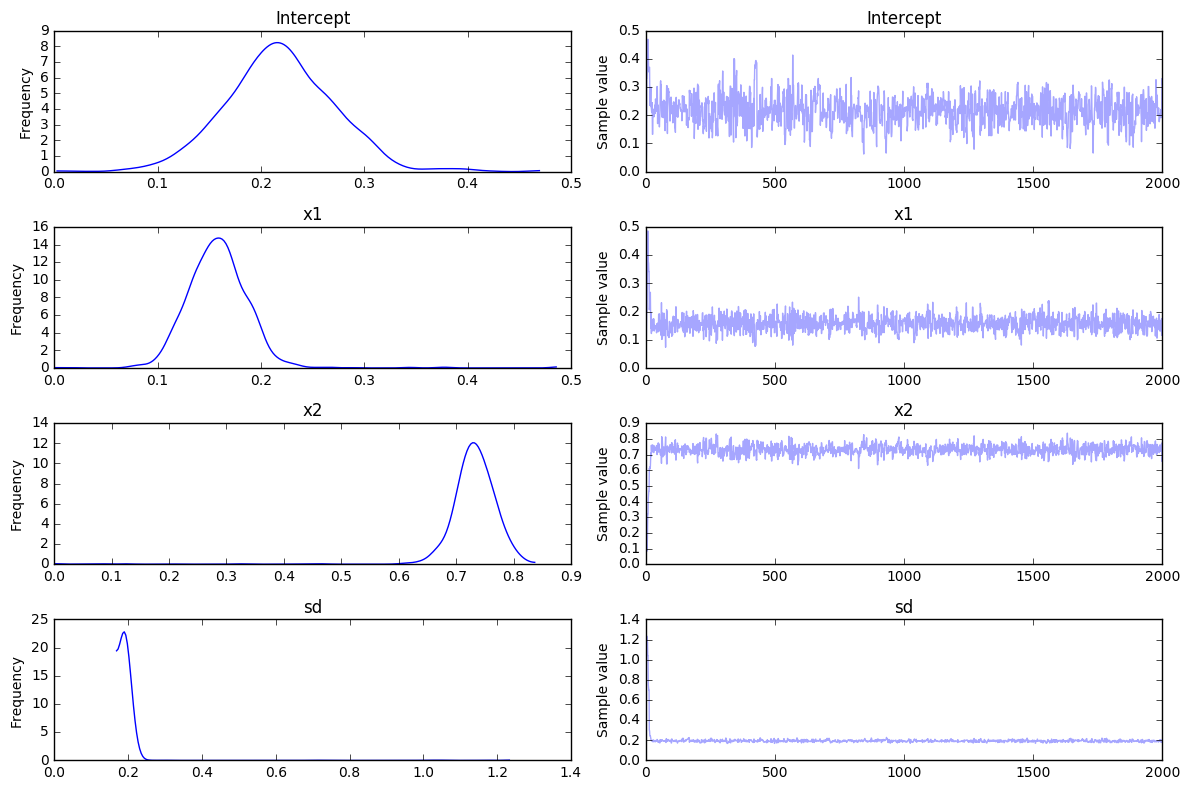

In [12]:
plt.figure(figsize=(7, 7))
traceplot(trace)
plt.tight_layout();

One can see that for every drawn sample it gives the parameter values for the intercept, x1 and x2

In [ ]:
intercept = np.median(trace.Intercept)
print(intercept)
x1param = np.median(trace.x1)
print(x1param)
x2param = np.median(trace.x2)
print(x2param)

Now is the time to see how well we have done!

In [ ]:
print('Model 1:',mean_absolute_error(true_regression_line,model1))
print('Model 2:', mean_absolute_error(true_regression_line,model2))
print('Average:',mean_absolute_error(true_regression_line,model1*.5+model2*.5))
print('MCMC:',mean_absolute_error(true_regression_line,intercept+x1param*model1+x2param*model2))

I hope this helps!